In [11]:
XLU = GetRet(["SPTR5UTL Index"])   #GetRet(["XLU US Equity"])
XLRE = GetRet(["XLRE US Equity"])

Bund = GetRet(["RX1 Comdty"])
UST20 = GetRet(["SPBDU20T Index"])
UST10 = GetRet(["SPBDU10T Index"])   # GetRet(["IEF US Equity"])

SPX = GetRet(["SPX Index"])

In [12]:
def CheckSpread(XLU_Betaneutral, UST):
    USMarket = pd.DataFrame(XLU_Betaneutral - UST).dropna()
    USMarket.columns = ["Spread"]

    i = 40
    USMarket["Mean"] = USMarket.Spread.rolling(i).mean()
    plt.plot(USMarket.cumsum()[-50:])
    plt.xticks(rotation = 45)
    plt.show()
    
    Orig = USMarket[["Spread", "Mean"]].cumsum()
    Orig["Diff"] = Orig.Mean - Orig.Spread
    print(Orig.Diff[-5:])


In [13]:
# For XLU

BetaU = 0.366
XLU_Betaneutral = XLU -BetaU*SPX

In [14]:
#For XLRE

BetaRE = 0.748
XLRE_BetaNeutral =  XLRE -BetaRE*SPX

In [15]:
UST20

2014-01-03   -0.000114
2014-01-06    0.002970
2014-01-07    0.001861
2014-01-08   -0.003548
2014-01-09    0.004217
                ...   
2020-03-11    0.005243
2020-03-12   -0.016613
2020-03-13   -0.011248
2020-03-16    0.028577
2020-03-17   -0.044173
Length: 1552, dtype: float64

## TO RUN

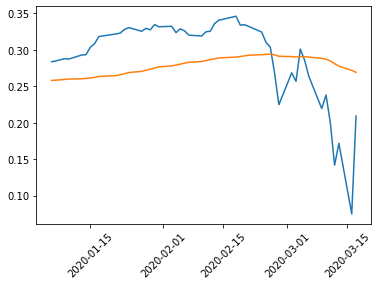

2020-03-11    0.084683
2020-03-12    0.139302
2020-03-13    0.105961
2020-03-16    0.197090
2020-03-17    0.059957
Name: Diff, dtype: float64


In [16]:
CheckSpread(XLU -BetaU*SPX, 0.736*UST20)

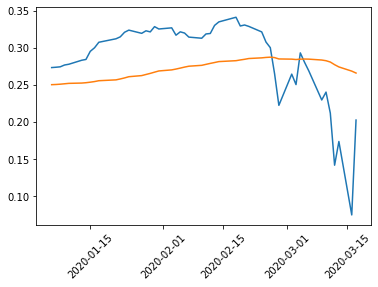

2020-03-11    0.068855
2020-03-12    0.135491
2020-03-13    0.100504
2020-03-16    0.193843
2020-03-17    0.063367
Name: Diff, dtype: float64


In [17]:
CheckSpread(XLU -BetaU*SPX, 1.05*UST10)

In [18]:
UST20

2014-01-03   -0.000114
2014-01-06    0.002970
2014-01-07    0.001861
2014-01-08   -0.003548
2014-01-09    0.004217
                ...   
2020-03-11    0.005243
2020-03-12   -0.016613
2020-03-13   -0.011248
2020-03-16    0.028577
2020-03-17   -0.044173
Length: 1552, dtype: float64

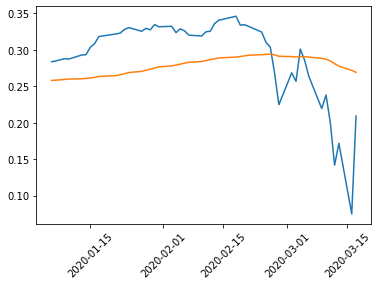

2020-03-11    0.084683
2020-03-12    0.139302
2020-03-13    0.105961
2020-03-16    0.197090
2020-03-17    0.059957
Name: Diff, dtype: float64


In [19]:
CheckSpread(XLU -BetaU*SPX, 0.736*UST20)

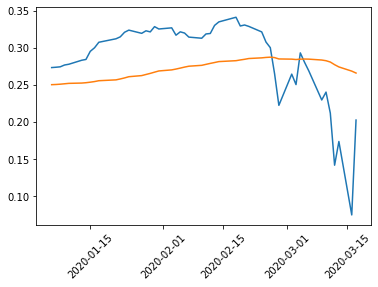

2020-03-11    0.068855
2020-03-12    0.135491
2020-03-13    0.100504
2020-03-16    0.193843
2020-03-17    0.063367
Name: Diff, dtype: float64


In [20]:
CheckSpread(XLU -BetaU*SPX, 1.05*UST10)

In [1136]:
df

2014-01-03         NaN
2014-01-06         NaN
2014-01-07         NaN
2014-01-08         NaN
2014-01-09         NaN
                ...   
2020-02-25   -0.020677
2020-02-26   -0.012825
2020-02-27    0.021772
2020-02-28    0.062526
2020-03-02    0.020209
Name: Diff, Length: 1541, dtype: float64

## STOP HERE

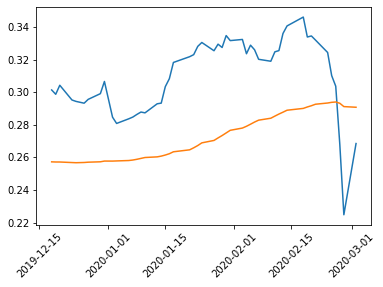

In [1128]:
df = CheckSpread(XLU -BetaU*SPX, 0.736*UST20)

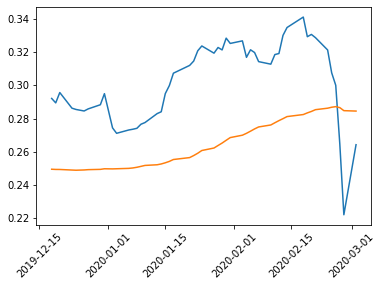

In [1129]:
df = CheckSpread(XLU -BetaU*SPX, 1.05*UST10)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xbbg import blp

In [2]:
def GetPrices(Liste, Start = "20140101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= Liste,start_date = Start , end_date = End)
    Res.columns = [x[0] for x in Res.columns]
    return Res


def GetRet(Liste, Start = "20140101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= Liste,start_date = Start , end_date = End)
    Res.columns = [x[0] for x in Res.columns]
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    Ret = Ret.T.mean()
    return Ret

def GetBench(Index, Start = "20100101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= Index + " Index",start_date = Start , end_date = End)
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    Ret.columns = [Index]
    return Ret

def Plot(Ret):
    Ret = Ret + 1
    if type(Ret) == type(pd.Series(0)):
        Ret[0] = 100
    else:
        Ret.iloc[0,0] = 100
    plt.plot(Ret.cumprod())

In [3]:
plt.plot((Bund - UST).cumsum())

NameError: name 'Bund' is not defined

In [550]:
Bund = GetRet(["RX1 Comdty"])
UST = GetRet(["TLT US Equity"])

In [551]:
SPX = GetPrices(["ES1 Index"])

In [552]:
XLU = GetPrices(["XLU US Equity"]) # GetRet(["XLRE US Equity"]) 

In [553]:
XLU = XLU.T.mean() / SPX.T.mean()

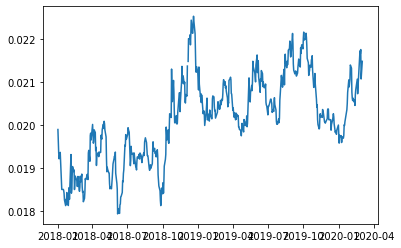

In [554]:
plt.plot(XLU)

# Beta

In [832]:
i = 252

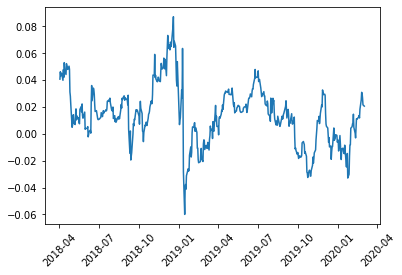

In [572]:
# Bund
dicG = {}
for x in range(len(UST)-i):
    Window = pd.concat((Bund, XLU), axis=1).iloc[x:x+i,:].dropna()
    dicG[UST.index[x+i]] = (Window.cov() / Window.iloc[:,0].std()**2).iloc[0,1]
plt.plot(pd.Series(dicG))
plt.xticks(rotation = 45)
plt.show()

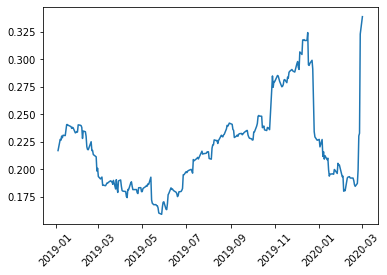

In [833]:
# US
dicUS = {}
for x in range(len(UST)-i):
    Window = pd.concat((SPX, XLU), axis=1).iloc[x:x+i,:].dropna()
    dicUS[UST.index[x+i]] = (Window.cov() / Window.iloc[:,0].std()**2).iloc[0,1]
plt.plot(pd.Series(dicUS))
plt.xticks(rotation = 45)
plt.show()

### YTD:

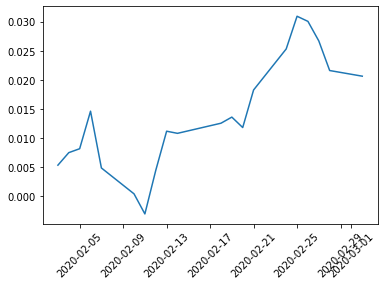

In [574]:
# Bund
plt.plot(pd.Series(dicG)[-20:])
plt.xticks(rotation = 45)
plt.show()

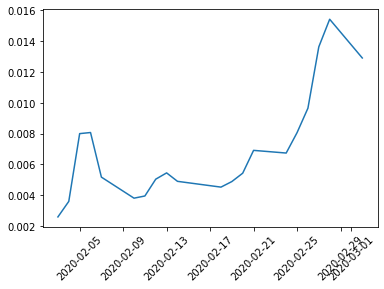

In [575]:
# US
plt.plot(pd.Series(dicUS)[-20:])
plt.xticks(rotation = 45)
plt.show()

# Correl

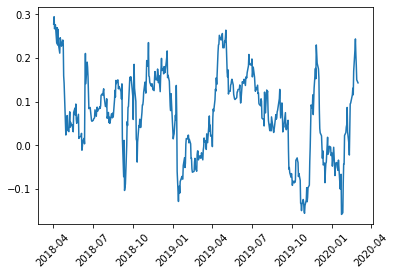

In [576]:
# Bund
diccorrelG = {}
for x in range(len(UST)-i):
    Window = pd.concat((Bund, XLU), axis=1).iloc[x:x+i,:].dropna()
    diccorrelG[UST.index[x+i]] = (Window.corr()).iloc[0,1]
plt.plot(pd.Series(diccorrelG))
plt.xticks(rotation = 45)
plt.show()

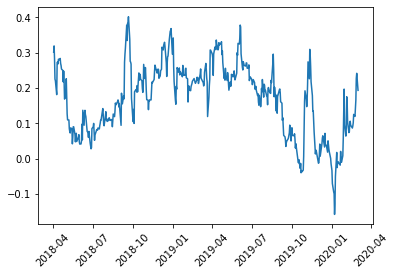

In [577]:
# US
diccorrelUS = {}
for x in range(len(UST)-i):
    Window = pd.concat((UST, XLU), axis=1).iloc[x:x+i,:].dropna()
    diccorrelUS[UST.index[x+i]] = (Window.corr()).iloc[0,1]
plt.plot(pd.Series(diccorrelUS))
plt.xticks(rotation = 45)
plt.show()

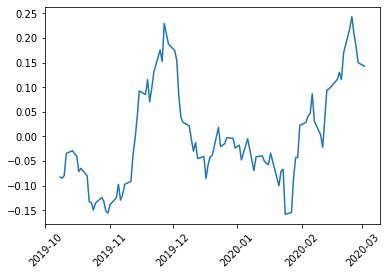

In [578]:
plt.plot(pd.Series(diccorrelG)[-252:][-100:])
plt.xticks(rotation = 45)
plt.show()

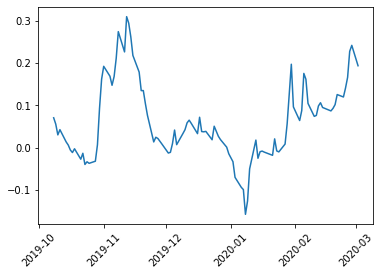

In [580]:
plt.plot(pd.Series(diccorrelUS)[-252:][-100:])
plt.xticks(rotation = 45)
plt.show()

# Spread

In [581]:
Spread = np.log(XLU) - np.log(XLU.shift(1)) - UST

In [582]:
#Spread = XLU - UST

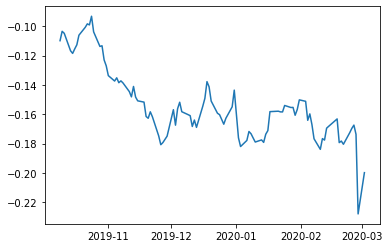

In [586]:
plt.plot(test.cumsum()[-100:])

In [568]:
dicSpread = {}
for x in range(len(UST)-i):
    Window = pd.concat((UST, Spread), axis=1).iloc[x:x+i,:].dropna()
    dicSpread[UST.index[x+i]] = (Window.cov() / Window.iloc[:,0].std()**2).iloc[0,1]

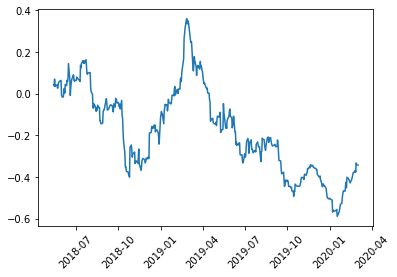

In [569]:
# Bund
plt.plot(pd.Series(dicSpread))
plt.xticks(rotation = 45)
plt.show()

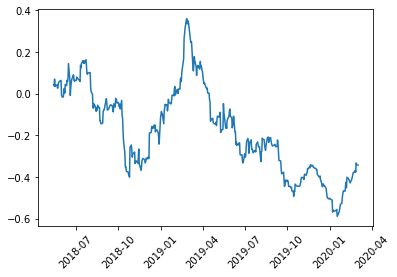

In [570]:
# US
plt.plot(pd.Series(dicSpread))
plt.xticks(rotation = 45)
plt.show()

In [729]:
Test = pd.DataFrame((XLU - Bund)).dropna()
Test.columns = ["Spread"]

In [730]:
Test["Mean"] = Test.Spread.mean()
Test["3 std"] = Test.Spread.mean() + 3 * Test.Spread.std()
Test["-3 std"] = Test.Spread.mean() - 3 * Test.Spread.std()

In [731]:
Test[Test.Spread < (Test.Spread.mean() - 3 * Test.Spread.std())]

,Spread,Mean,3 std,-3 std


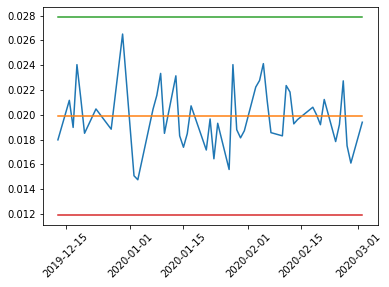

In [732]:
plt.plot(Test.iloc[-50:,:])
plt.xticks(rotation = 45)
plt.show()

In [737]:
# CumSum = pd.DataFrame((XLU - UST).cumsum()).dropna()
# np.log(XLU) - np.log(XLU.shift(1)) - UST
CumSum = pd.DataFrame((np.log(XLU) - np.log(XLU.shift(1)) - Bund).cumsum()).dropna()
CumSum.columns = ["Spread"]

In [738]:
i = 60
CumSum["Mean"] = CumSum.rolling(i).mean()
CumSum["1std"] = CumSum.Mean + 3 * CumSum.Spread.rolling(i).std()
CumSum["-1std"] = CumSum.Mean - 3 * CumSum.Spread.rolling(i).std()

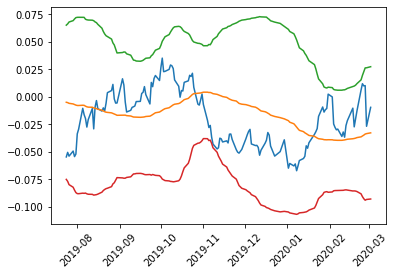

In [739]:
plt.plot(CumSum.iloc[-150:])
plt.xticks(rotation = 45)
plt.show()

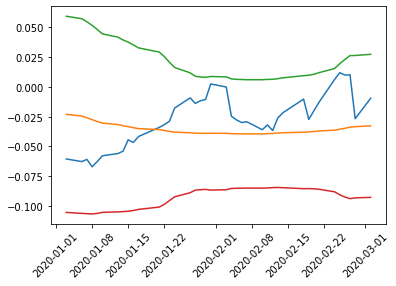

In [740]:
plt.plot(CumSum.iloc[-40:])
plt.xticks(rotation = 45)
plt.show()

In [794]:
XLU = GetRet(["XLU US Equity"])
Bund = GetRet(["RX1 Comdty"])
UST = GetRet(["TLT US Equity"])
SPX = GetRet(["SPX Index"])

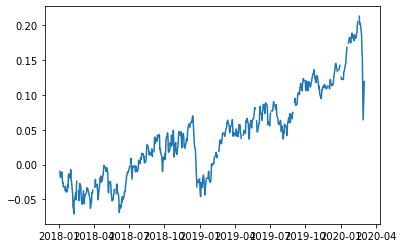

In [744]:
plt.plot((XLU - Bund).cumsum())

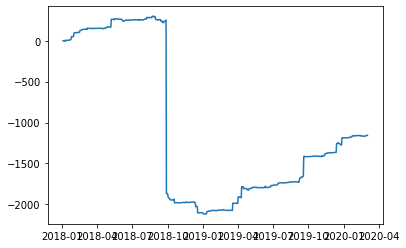

In [815]:
plt.plot(((XLU/SPX) - UST).cumsum())

In [820]:
(XLU/SPX)[(XLU/SPX) == (XLU/SPX).min()]

2018-09-28   -2118.491886
dtype: float64

In [803]:
 SPX.mean() / SPX.std()

0.02548420724769292

In [821]:
USMarket = pd.DataFrame(XLU - UST)
USMarket.columns = ["Spread"]

In [822]:
i = 60
USMarket["Mean"] = USMarket.Spread.rolling(i).mean()
USMarket["ExcessRet"] = USMarket.Spread - USMarket.Mean

In [823]:
Orig = USMarket[["Spread", "Mean"]].cumsum()
Orig["Diff"] = Orig.Mean - Orig.Spread
Orig.Diff[-3:]

2020-02-27    0.108642
2020-02-28    0.162912
2020-03-02    0.096205
Name: Diff, dtype: float64

# Excess Cumulated Returns

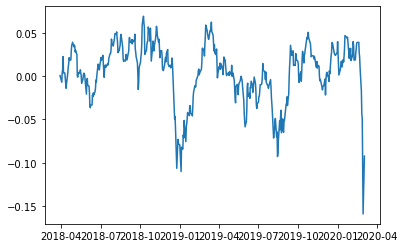

In [824]:
plt.plot(USMarket.ExcessRet.cumsum())

In [825]:
df = pd.DataFrame(USMarket.ExcessRet.cumsum())

In [826]:
df["Mean"] = df.ExcessRet.rolling(252).mean()

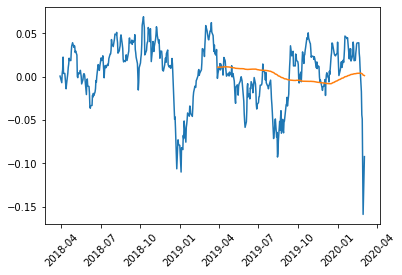

In [827]:
plt.plot(df)
plt.xticks(rotation = 45)
plt.show()

In [828]:
df.Mean[-1] - df.ExcessRet[-1]

0.09355485881348863

In [829]:
USMarket

,Spread,Mean,ExcessRet
2018-01-03,-0.012657,NaN,NaN
2018-01-04,-0.008180,NaN,NaN
2018-01-05,0.002470,NaN,NaN
2018-01-08,0.009944,NaN,NaN
2018-01-09,0.003570,NaN,NaN
...,...,...,...
2020-02-25,-0.026538,0.000153,-0.026691
2020-02-26,-0.004881,-0.000006,-0.004875
2020-02-27,-0.056815,-0.000973,-0.055843
2020-02-28,-0.056325,-0.002055,-0.054270


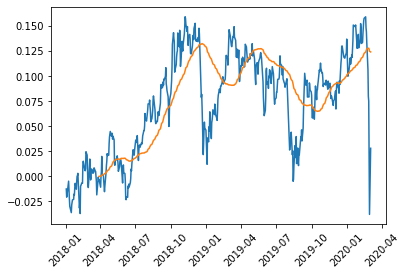

In [830]:
plt.plot(USMarket[["Spread", "Mean"]].cumsum())
plt.xticks(rotation = 45)
plt.show()

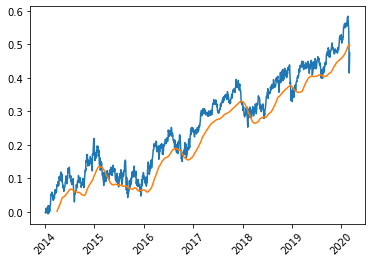

In [1063]:
df = CheckSpread(XLU , 0.736*UST20)

In [1044]:
df.to_clipboard()

In [1084]:
TestBeta * SPX

2014-01-03         NaN
2014-01-06         NaN
2014-01-07         NaN
2014-01-08         NaN
2014-01-09         NaN
                ...   
2020-02-25   -0.006487
2020-02-26   -0.000918
2020-02-27   -0.011062
2020-02-28   -0.002769
2020-03-02    0.015766
Length: 1550, dtype: float64

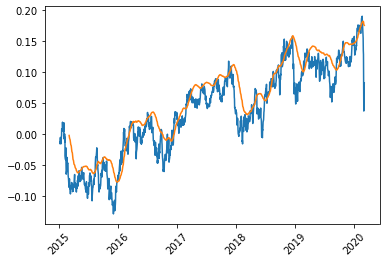

2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
2015-01-09         NaN
                ...   
2020-02-25    0.047063
2020-02-26    0.052944
2020-02-27    0.094526
2020-02-28    0.139501
2020-03-02    0.092643
Name: Diff, Length: 1289, dtype: float64

In [1085]:
CheckSpread(XLU -TestBeta*SPX, UST20)

2020-02-18    0.026931
2020-02-19    0.044208
2020-02-20    0.032976
2020-02-21    0.023661
2020-02-24    0.019214
2020-02-25    0.024305
2020-02-26    0.029521
2020-02-27    0.058497
2020-02-28    0.088006
2020-03-02    0.070906
Name: Diff, dtype: float64

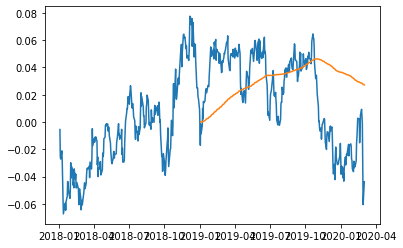

In [907]:
CheckSpread(XLRE -BetaRE*SPX, UST10)

2020-02-18    0.052718
2020-02-19    0.069734
2020-02-20    0.063002
2020-02-21    0.058507
2020-02-24    0.060659
2020-02-25    0.067810
2020-02-26    0.067787
2020-02-27    0.102209
2020-02-28    0.142350
2020-03-02    0.117721
Name: Diff, dtype: float64

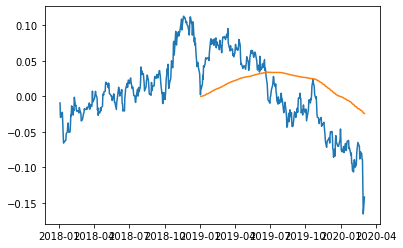

In [908]:
CheckSpread(XLRE -BetaRE*SPX, UST20)

2020-02-19   NaN
2020-02-20   NaN
2020-02-21   NaN
2020-02-24   NaN
2020-02-25   NaN
2020-02-26   NaN
2020-02-27   NaN
2020-02-28   NaN
2020-03-02   NaN
2020-03-03   NaN
Name: Diff, dtype: float64

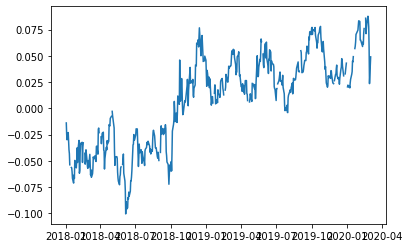

In [901]:
CheckSpread(XLU -Beta*SPX, Bund)

In [1078]:
dic = {}
for x in range(len(XLU) - 252):
    Window = pd.concat((SPX, XLU), axis = 1).iloc[x:x+252, :].dropna()
    dic[XLU.index[252+x]] = (Window.cov() / Window.iloc[:,0].std()**2).iloc[0,1]

In [1082]:
TestBeta =  pd.Series(dic)

In [1013]:
(Window.cov() / Window.iloc[:,0].std()**2).iloc[0,1]

0.35027711953247154

In [1014]:
Window

,0,1
2019-03-01,0.006872,0.002051
2019-03-04,-0.003888,0.002321
2019-03-05,-0.001132,-0.001681
2019-03-06,-0.006545,0.000326
2019-03-07,-0.008159,0.003294
...,...,...
2020-02-24,-0.034088,-0.011688
2020-02-25,-0.030748,-0.021872
2020-02-26,-0.003786,-0.009709
2020-02-27,-0.045168,-0.046392


In [1021]:
(Window.iloc[:,0] @ Window.iloc[:,1])/(Window.iloc[:,0] @ Window.iloc[:,0])

0.3515467498312726

In [1105]:
pd.concat((XLU-TestBeta*SPX, UST10), axis=1).dropna().cov()

,0,1
0,0.000072,0.000011
1,0.000011,0.000011


In [1110]:
pd.concat((XLU-TestBeta*SPX, UST10), axis=1).cov()/UST10.std()**2

,0,1
0,6.787408,1.024956
1,1.024956,1.000000


In [1107]:
pd.concat((XLU-TestBeta*SPX, UST10), axis=1).dropna().iloc[:,1].std() 

0.003304973833284216

In [1106]:
(pd.concat((XLU-TestBeta*SPX, UST10), axis=1).dropna().cov()) / (pd.concat((XLU-TestBeta*SPX, UST10), axis=1).dropna().iloc[:,1].std() ** 2)

,0,1
0,6.621439,0.998025
1,0.998025,1.000000


In [1098]:
pd.concat((XLU-TestBeta*SPX, UST10), axis=1).dropna().cov() / pd.concat((XLU-TestBeta*SPX, UST10), axis=1).dropna().iloc[:,1].std()**2

,0,1
0,6.621439,0.998025
1,0.998025,1.000000


In [1091]:
pd.concat((XLU-TestBeta*SPX, UST10), axis=1).dropna().corr()

,0,1
0,1.000000,0.387851
1,0.387851,1.000000


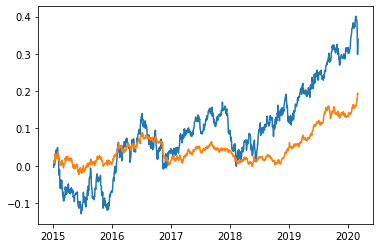

In [1093]:
plt.plot(pd.concat((XLU-TestBeta*SPX, UST10), axis=1).dropna().cumsum())

In [1097]:
pd.concat((XLU-TestBeta*SPX, UST10), axis=1).dropna().to_clipboard()

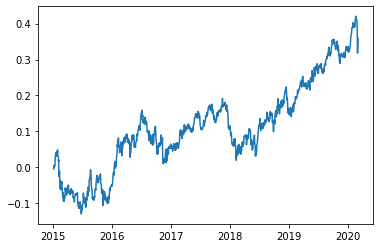

In [1111]:
plt.plot((XLU-TestBeta*SPX).cumsum())

In [1112]:
Test = (XLU-TestBeta*SPX)

In [1113]:
Test = Test + 1

In [1114]:
Test[0] = 100

In [1115]:
Test = Test.cumprod()

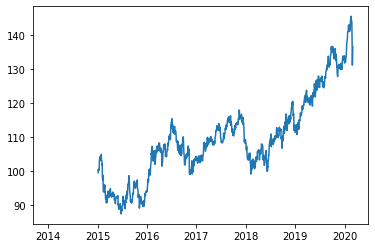

In [1116]:
plt.plot(Test)

In [1118]:
Test["Max"] = 0

In [ ]:
for x in range(1,len(Test)):
    Test.Max = Test.iloc[x,0]